## Installing Important Library

In [1]:
# pip install pandas

## Importing Important Library

In [2]:
import pandas as pd

## Loading Dataset

In [3]:
extracted_data = pd.read_csv('MoviesOnStreamingPlatforms.csv')

In [4]:
extracted_data.head(6)

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
5,5,6,To All the Boys I've Loved Before,2018,13+,94/100,1,0,0,0,0


## *Preparing Columns I will Work With*

In [5]:
extracted_data = extracted_data.set_index(['ID'])

In [6]:
extracted_data = extracted_data.drop(['Unnamed: 0' ] , axis = 1 )

In [7]:
# extracted_data['Year'] = pd.to_datetime(extracted_data['Year'] , format = '%Y' , errors = 'coerce')

In [8]:
extracted_data.isnull().sum()

Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [9]:
extracted_data.head(3)

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,
1,The Irishman,2019,18+,98/100,1,0,0,0,0
2,Dangal,2016,7+,97/100,1,0,0,0,0
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0


In [10]:
def get_decade(year):
    return str(year)[:3] + '0s'

extracted_data['Decade'] = extracted_data['Year'].apply(get_decade)

In [11]:
age_mapping = {'13+' : 13 ,
           '16+' : 16 ,
           '18+' : 18  ,
           'all' :  0 ,
           '7+' : 7}

extracted_data['Age'] = extracted_data['Age'].map(age_mapping)

In [12]:
extracted_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,9515.0,2007.422386,19.130367,1914.0,2006.0,2015.0,2018.0,2021.0
Age,5338.0,12.361933,6.338357,0.0,7.0,13.0,18.0,18.0
Netflix,9515.0,0.388334,0.487397,0.0,0.0,0.0,1.0,1.0
Hulu,9515.0,0.110037,0.312952,0.0,0.0,0.0,0.0,1.0
Prime Video,9515.0,0.432265,0.495417,0.0,0.0,0.0,1.0,1.0
Disney+,9515.0,0.096900,0.295837,0.0,0.0,0.0,0.0,1.0
Type,9515.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [13]:
median_age = extracted_data['Age'].median()
extracted_data['Age'] = extracted_data['Age'].fillna(median_age)

In [14]:
extracted_data['Age'] = extracted_data['Age'].astype(int)

In [15]:
extracted_data.isnull().sum() # We can see we have succesully dealt with age null vakues , now we have to deal with others

Title              0
Year               0
Age                0
Rotten Tomatoes    7
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
Decade             0
dtype: int64

In [16]:
extracted_data.dropna(inplace=True)

In [17]:
extracted_data['Rotten Tomatoes'] = extracted_data['Rotten Tomatoes'].str.replace('/100' , '') #my column is out of 100 since
#i want to later be left with 0 and 1 i have to make sure i work easily work with non-fraction column

pd.to_numeric(extracted_data['Rotten Tomatoes'] , errors='coerce')

extracted_data['Rotten Tomatoes'] = extracted_data['Rotten Tomatoes'].astype(int)

extracted_data.head() #viewing if i have succesefully managed to remove '/100'

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Decade
ID,,,,,,,,,,
1,The Irishman,2019,18,98,1,0,0,0,0,2010s
2,Dangal,2016,7,97,1,0,0,0,0,2010s
3,David Attenborough: A Life on Our Planet,2020,7,95,1,0,0,0,0,2020s
4,Lagaan: Once Upon a Time in India,2001,7,94,1,0,0,0,0,2000s
5,Roma,2018,18,94,1,0,0,0,0,2010s


## *Visualizing Streaming Platforms Over Decades*

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# my plotting tools

In [19]:
average_movie_by_decade_on_netflix = extracted_data.groupby('Decade')['Netflix'].sum()
average_movie_by_decade_on_hulu = extracted_data.groupby('Decade')['Hulu'].sum()
average_movie_by_decade_on_primevideo = extracted_data.groupby('Decade')['Prime Video'].sum()
average_movie_by_decade_on_disney = extracted_data.groupby('Decade')['Disney+'].sum()
average_movie_by_decade_by_type = extracted_data.groupby('Decade')['Type'].sum()


average_movie_by_decade = extracted_data.groupby('Decade')['Rotten Tomatoes'].mean()

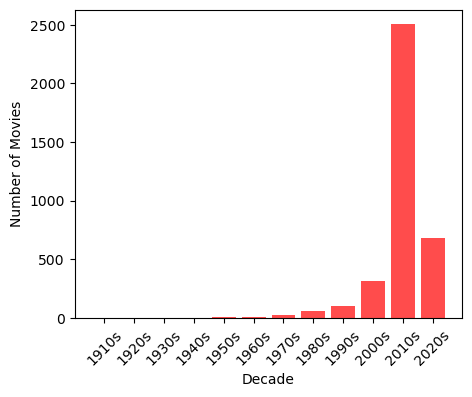

In [20]:
plt.figure(figsize=(5 , 4))
plt.bar(average_movie_by_decade.index , average_movie_by_decade_on_netflix , label = 'Netflix' , alpha = 0.7 , color= 'red')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 45)
plt.show()

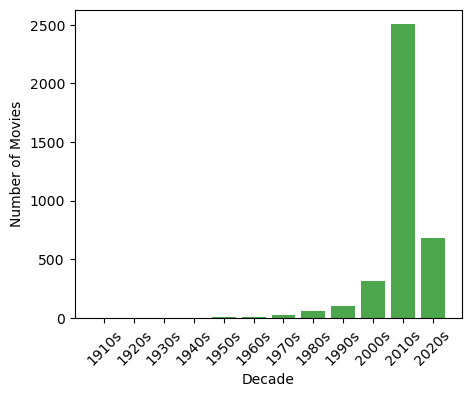

In [21]:
plt.figure(figsize=(5 , 4))
plt.bar(average_movie_by_decade.index , average_movie_by_decade_on_netflix , label = 'Hulu' , alpha = 0.7 , color='green')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 45)
plt.show()

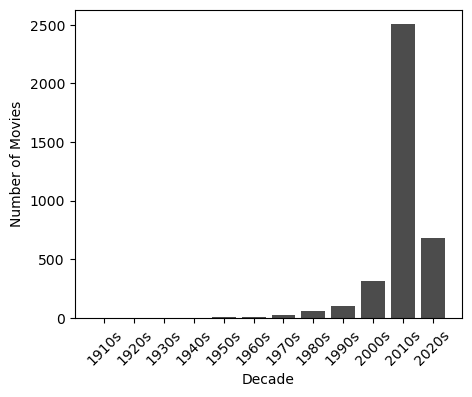

In [22]:
plt.figure(figsize=(5 , 4))
plt.bar(average_movie_by_decade.index ,average_movie_by_decade_on_netflix , label = 'Prime Video' , alpha = 0.7 , color='black')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 45)
plt.show()

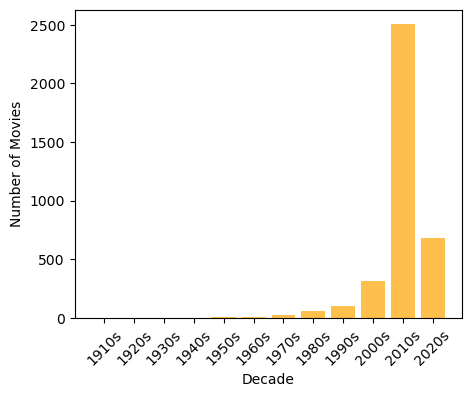

In [23]:
plt.figure(figsize=(5 , 4))
plt.bar(average_movie_by_decade.index , average_movie_by_decade_on_netflix , label = 'Disney+' , alpha = 0.7 , color= 'orange')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 45)
plt.show()

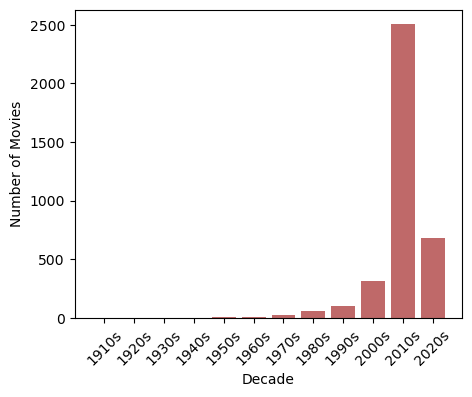

In [25]:
plt.figure(figsize=(5 , 4))
plt.bar(average_movie_by_decade.index , average_movie_by_decade_on_netflix , label = 'Type' , alpha = 0.7 , color='brown')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 45)
plt.show()

## *Average Rating Overtime*

In [26]:
average_movie_by_decade = extracted_data.groupby('Decade')['Rotten Tomatoes'].mean()

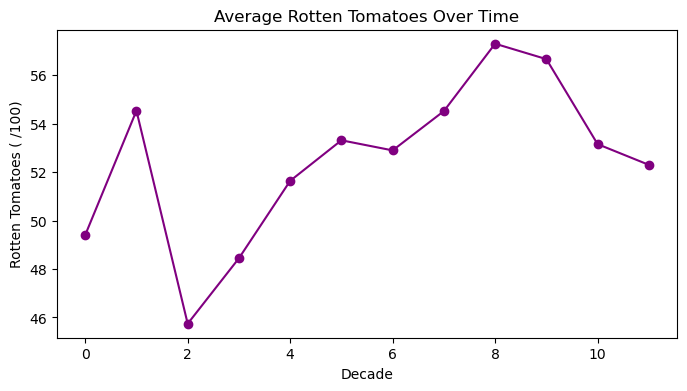

In [27]:
plt.figure(figsize=(8 , 4))
plt.plot(average_movie_by_decade.values , marker='o', color = 'purple')
plt.xlabel('Decade')
plt.ylabel('Rotten Tomatoes ( /100)')
plt.title('Average Rotten Tomatoes Over Time')
plt.show()

## *Average Rating Overtime*

In [28]:
# import seaborn as sns

In [29]:
age_count_by_decade = extracted_data.groupby(['Decade' ,'Age']).size().reset_index(name='AgeCount')

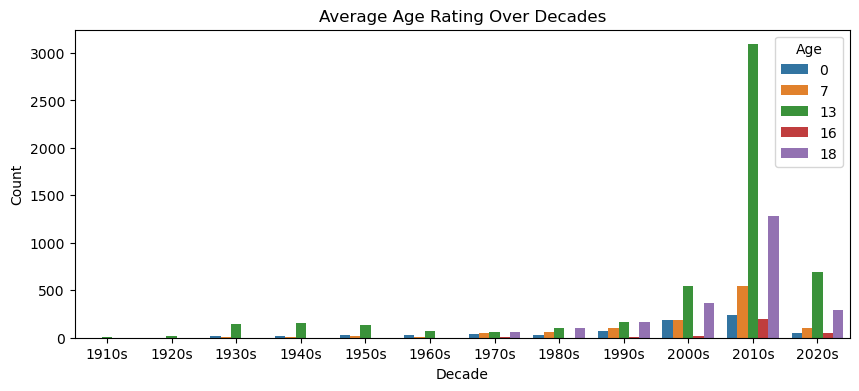

In [30]:
plt.figure(figsize=(10 , 4))
sns.barplot(x = 'Decade' , y='AgeCount' , hue='Age' , data= age_count_by_decade)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Average Age Rating Over Decades')
plt.show()

## *Visualizing Top 10 Movies*

In [31]:
top_10_movies = extracted_data.groupby('Decade').apply(lambda x:x.nlargest(1 , 'Rotten Tomatoes')).reset_index(drop=True)

In [32]:
movie_count_by_decade = extracted_data.groupby(['Decade' ,'Title']).size().reset_index(name='MovieCount')

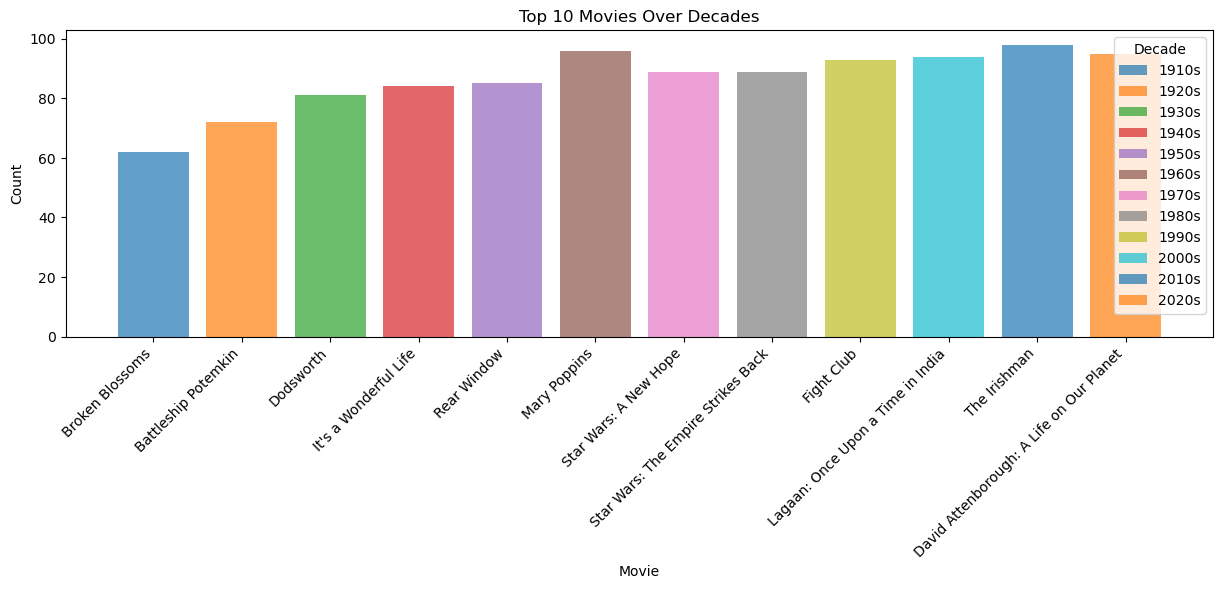

In [33]:
plt.figure(figsize=(13 , 4))
for decade , top_movies in top_10_movies.groupby('Decade'):
    plt.bar(top_movies['Title'] , top_movies['Rotten Tomatoes'] , label=decade , alpha=0.7)
plt.xlabel('Movie')
plt.ylabel('Count')
plt.title('Top 10 Movies Over Decades')
plt.tight_layout()
plt.xticks(rotation=45 , ha='right')
plt.legend(title='Decade' , loc='upper right')
plt.show()

## *Lebogang Francis Sindani*